## Text Data Insight

In [1]:
# text label distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../label.csv')
df.head()

,ID,text,image,label,class
0,1.0,neutral,positive,positive,2.0
1,2.0,neutral,positive,positive,2.0
2,3.0,neutral,positive,positive,2.0
3,4.0,positive,positive,positive,2.0
4,5.0,positive,positive,positive,2.0


In [2]:
# text label distribution statistics
print("\nText Label Distribution Statistics:")
print(df['text'].value_counts())


Text Label Distribution Statistics:
text
neutral     1921
positive    1653
negative     937
Name: count, dtype: int64


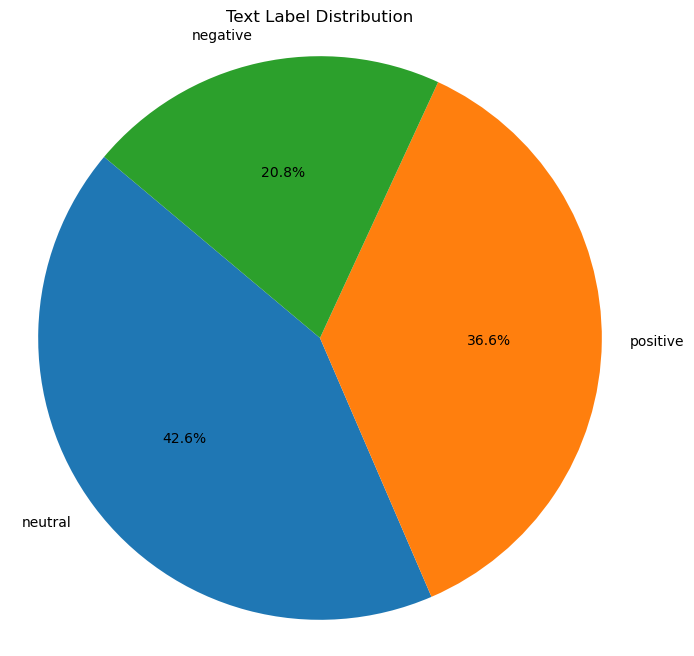

In [3]:
# text label distribution pie chart
plt.figure(figsize=(8, 8))
labels = df['text'].value_counts().index
sizes = df['text'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Text Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Image Label Distribution Statistics:
image
positive    2428
negative    1145
neutral      938
Name: count, dtype: int64


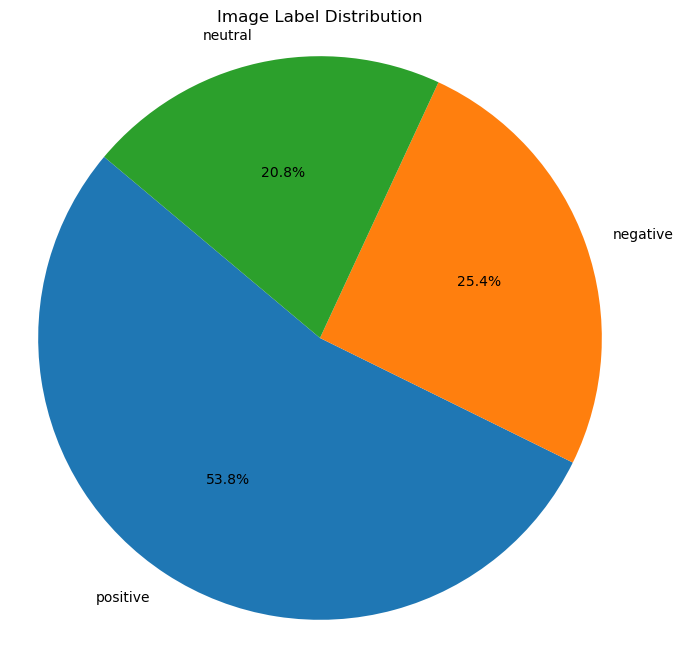

In [4]:
# image label distribution
print("\nImage Label Distribution Statistics:")
print(df['image'].value_counts())

# image label distribution pie chart
plt.figure(figsize=(8, 8))
labels = df['image'].value_counts().index
sizes = df['image'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Image Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Total Label Distribution Statistics:
label
positive    2683
negative    1358
neutral      470
Name: count, dtype: int64


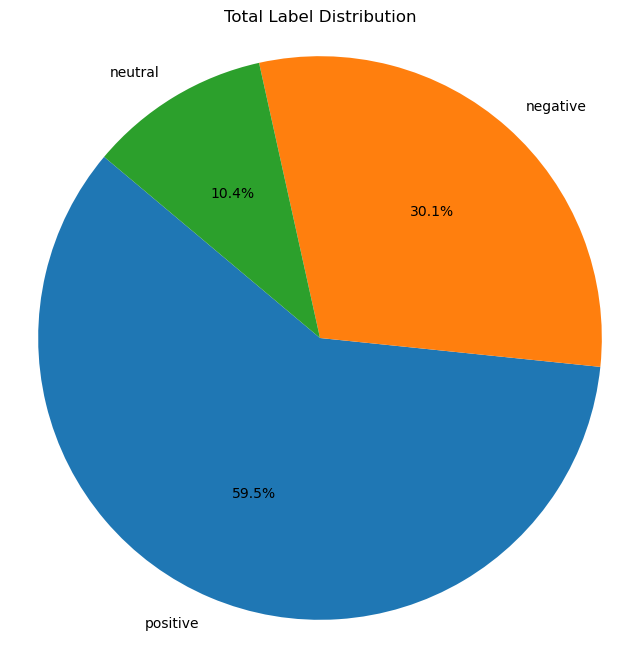

In [5]:
# total label distribution
print("\nTotal Label Distribution Statistics:")
print(df['label'].value_counts())

# total label distribution pie chart
plt.figure(figsize=(8, 8))
labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


100%|██████████| 14644/14644 [00:01<00:00, 14214.25it/s]


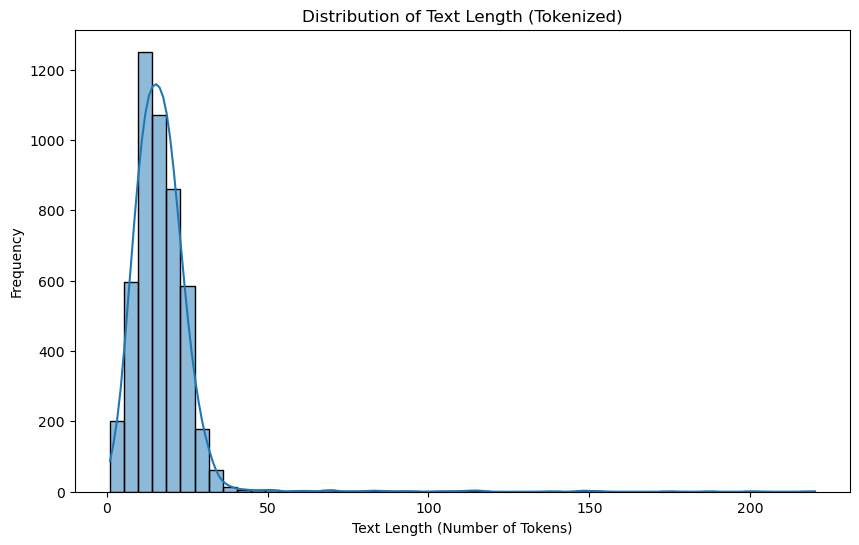


Text Length Statistics (Tokenized):
count    4869.000000
mean       16.936743
std        11.070500
min         1.000000
25%        11.000000
50%        16.000000
75%        21.000000
max       220.000000
dtype: float64


In [6]:
# read tweet from all %d.txt files and plot the length of the tweets

import os
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer
import nltk
import pandas as pd
from tqdm import tqdm

# Tweet Length Analysis
tokenizer = TweetTokenizer()

# read tweet from all raw_data/%d.txt files
data_dir = '../raw_data'
all_token_lengths = []
filenames = []
for filename in tqdm(os.listdir(data_dir)):
    if re.match(r'^\d+\.txt$', filename):
        filepath = os.path.join(data_dir, filename)
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                text = f.read()
                tokens = tokenizer.tokenize(text.lower())
                token_length = len(tokens)
                all_token_lengths.append(token_length)
                filenames.append(filename)
        except Exception as e:
            print(f"Error occurred when reading {filename}: {e}")

length_series = pd.Series(all_token_lengths, index=filenames)

# plot bar plot
plt.figure(figsize=(10, 6))
sns.histplot(length_series, bins=50, kde=True)
plt.title('Distribution of Text Length (Tokenized)')
plt.xlabel('Text Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.show()

print("\nText Length Statistics (Tokenized):")
print(length_series.describe())